In [2]:
import pandas as pd
wine2=pd.read_csv('PCA_2.csv')
wine2.head()

,class,PC1,PC2
0,1,3.316751,-1.443463
1,1,2.209465,0.333393
2,1,2.516740,-1.031151
3,1,3.757066,-2.756372
4,1,1.008908,-0.869831


In [3]:
wine3=pd.read_csv('PCA_3.csv')
wine3.head()

,class,PC1,PC2,PC3
0,1,3.316751,-1.443463,-0.165739
1,1,2.209465,0.333393,-2.026457
2,1,2.516740,-1.031151,0.982819
3,1,3.757066,-2.756372,-0.176192
4,1,1.008908,-0.869831,2.026688


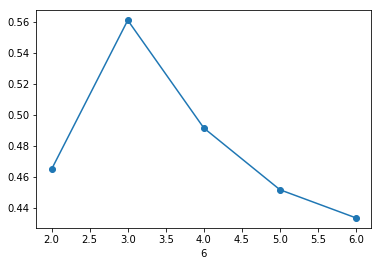

In [19]:
#对PCA2进行kmeans聚类
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
data=wine2[['PC1','PC2']]

#轮廓系数确定k值
K=range(2,7)
sil_score=[]
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data)
    sil_score.append(silhouette_score(data,kmeans.labels_,metric='euclidean'))
plt.plot(K,sil_score,'o-')
plt.xlabel(k)
plt.show()



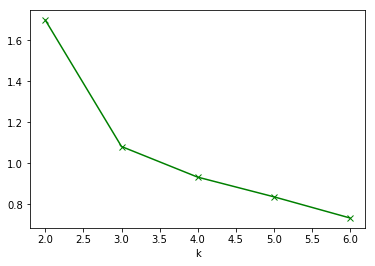

In [5]:
#使用肘部法确定k值
import numpy as np
from scipy.spatial.distance import cdist
sse_result=[]
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data)
    sse_result.append(sum(np.min(cdist(data,kmeans.cluster_centers_,'euclidean'),axis=1))/data.shape[0])
plt.plot(K,sse_result,'gx-')
plt.xlabel('k')
plt.show()

可以看出当k值取3时效果最佳

In [6]:
#效果可视化与正确率分析
k=3
kmeans = KMeans(n_clusters=k)
cluster_labels = kmeans.fit_predict(data)

In [7]:
# 计算FMI
#将每一个class中的数据按照cluster分组
from sklearn.metrics.cluster import fowlkes_mallows_score
df=pd.DataFrame({'cluster': cluster_labels, 'class': wine2['class']})
fmi_score = fowlkes_mallows_score(df['class'], df['cluster'])
print("FMI:", fmi_score)

FMI: 0.9303622792173031


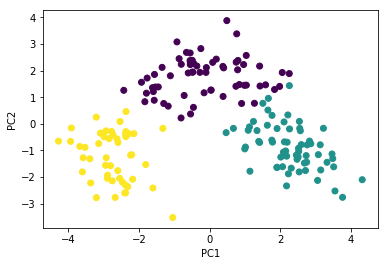

In [8]:
#通过创建散点图进行可视化，根据聚类结果对数据点着色
plt.scatter(data['PC1'], data['PC2'], c=cluster_labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

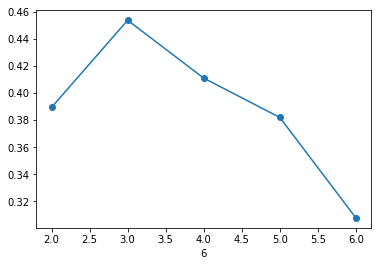

In [9]:
#对PCA3进行kmeans聚类
#通过轮廓系数最佳k值
K=range(2,7)
data=wine3[['PC1','PC2','PC3']]
sil_score=[]
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data)
    sil_score.append(silhouette_score(data,kmeans.labels_,metric='euclidean'))
plt.plot(K,sil_score,'o-')
plt.xlabel(k)
plt.show()

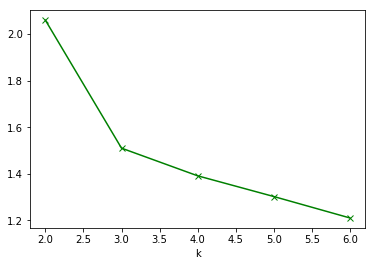

In [10]:
#肘部法确定最佳k值
sse_result=[]
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data)
    sse_result.append(sum(np.min(cdist(data,kmeans.cluster_centers_,'euclidean'),axis=1))/data.shape[0])
plt.plot(K,sse_result,'gx-')
plt.xlabel('k')
plt.show()

In [11]:
#对PCA3聚类
k=3
kmeans = KMeans(n_clusters=k)
cluster_labels = kmeans.fit_predict(data)

In [12]:
#计算FMI
df=pd.DataFrame({'cluster': cluster_labels, 'class': wine3['class']})
fmi_score = fowlkes_mallows_score(df['class'], df['cluster'])
print("FMI:", fmi_score)

FMI: 0.9205411378393452


In [30]:
#三维聚类可视化
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['PC1'],data['PC2'], data['PC3'],  c=cluster_labels)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>

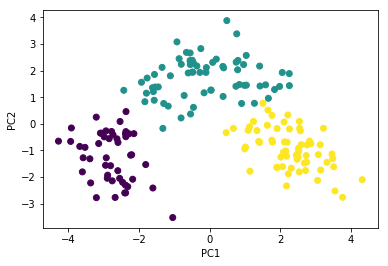

In [13]:
#使用高斯混合聚类
from sklearn.mixture import GaussianMixture
data=wine2[['PC1','PC2']]
gmm = GaussianMixture(n_components=3, random_state=0)  # 假设要将数据分为3个簇
gmm.fit(data)

# 获取每个数据点所属的簇
clusters = gmm.predict(data)

# 可视化聚类结果
plt.scatter(wine2['PC1'], wine2['PC2'], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

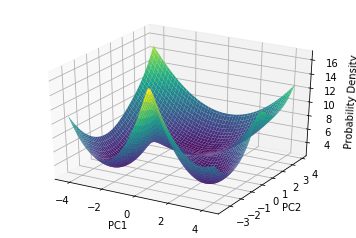

In [21]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture

#创建高斯混合模型对象
gmm = GaussianMixture(n_components=3, random_state=0)

#拟合模型
gmm.fit(data)

#生成网格数据
x = np.linspace(data['PC1'].min(), data['PC1'].max(), 100)
y = np.linspace(data['PC2'].min(), data['PC2'].max(), 100)
X, Y = np.meshgrid(x, y)
Z = -gmm.score_samples(np.array([X.ravel(), Y.ravel()]).T)
Z = Z.reshape(X.shape)

#绘制三维图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

#设置坐标轴标签
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Probability Density')

plt.show()

In [18]:
#计算FMI系数
df=pd.DataFrame({'cluster': clusters, 'class': wine2['class']})
fmi_score = fowlkes_mallows_score(df['class'], df['cluster'])
print("FMI:", fmi_score)

FMI: 0.9426638123665707


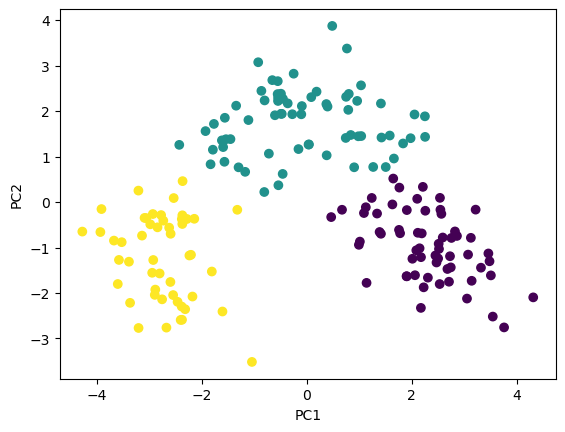

In [ ]:
#学习向量聚类
from sklearn_lvq import GlvqModel
# 创建并拟合LVQ模型
lvq = GlvqModel()
lvq.fit(data, wine2['class'])

# 获取每个数据点所属的簇
clusters = lvq.predict(data)


# 可视化聚类结果
plt.scatter(data['PC1'], data['PC2'], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# 可视化聚类结果
plt.scatter(data['PC1'], data['PC2'], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
#计算FMI
df=pd.DataFrame({'cluster': clusters, 'class': wine2['class']})
fmi_score = fowlkes_mallows_score(df['class'], df['cluster'])
print("FMI:", fmi_score)

FMI: 0.9417487765865837


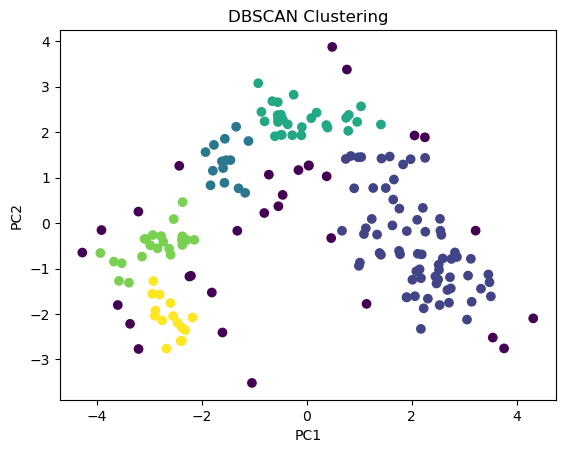

In [ ]:
#尝试密度聚类
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)  

# 将特征转换为数组
X = wine2[['PC1', 'PC2']].values

# 拟合 DBSCAN 模型
dbscan_model.fit(X)

# 获取聚类标签
cluster_labels = dbscan_model.labels_

# 可视化聚类结果
plt.scatter(wine2['PC1'], wine2['PC2'], c=cluster_labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
#计算FMI
df=pd.DataFrame({'cluster': cluster_labels, 'class': wine2['class']})
fmi_score = fowlkes_mallows_score(df['class'], df['cluster'])
print("FMI:", fmi_score)

FMI: 0.5581873211398917


C:\Anaconda\envs\tf2\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


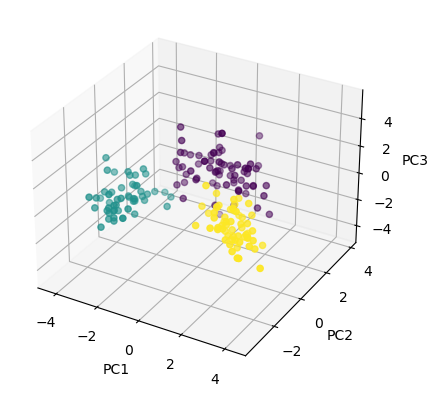

In [ ]:
#对于'PCA_3'的聚类分析
#使用高斯混合聚类
data=wine3[['PC1','PC2','PC3']]
gmm = GaussianMixture(n_components=3, random_state=0) 
gmm.fit(data)
clusters = gmm.predict(data)
#三维聚类可视化
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['PC1'],data['PC2'], data['PC3'],  c=clusters)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [ ]:
#FMI计算
df=pd.DataFrame({'cluster': clusters, 'class': wine3['class']})
fmi_score = fowlkes_mallows_score(df['class'], df['cluster'])
print("FMI:", fmi_score)

FMI: 0.9206796864640607


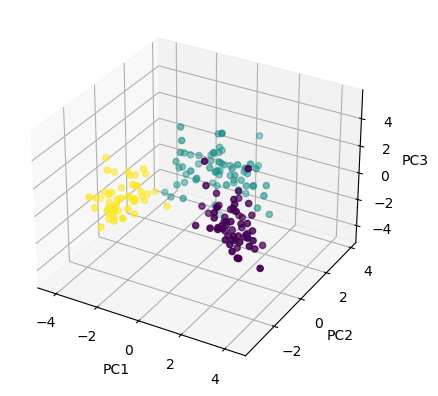

In [ ]:
#学习向量对PCA3进行聚类
lvq = GlvqModel()
lvq.fit(data, wine3['class'])

# 获取每个数据点所属的簇
clusters = lvq.predict(data)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['PC1'],data['PC2'], data['PC3'],  c=clusters)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [ ]:
df=pd.DataFrame({'cluster': clusters, 'class': wine3['class']})
fmi_score = fowlkes_mallows_score(df['class'], df['cluster'])
print("FMI:", fmi_score)

FMI: 0.9649389867007279


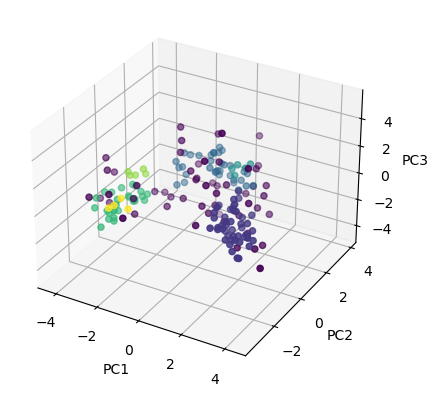

In [ ]:
#PC3的密度聚类

dbscan_model = DBSCAN(eps=0.7, min_samples=3)  

X = wine3[['PC1', 'PC2','PC3']].values

# 拟合 DBSCAN 模型
dbscan_model.fit(X)

# 获取聚类标签
cluster_labels = dbscan_model.labels_

# 可视化聚类结果
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['PC1'],data['PC2'], data['PC3'],  c=cluster_labels)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [ ]:
df=pd.DataFrame({'cluster': cluster_labels, 'class': wine3['class']})
fmi_score = fowlkes_mallows_score(df['class'], df['cluster'])
print("FMI:", fmi_score)

FMI: 0.5941655487745057
